### Importación de librerías

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Obtención de los datos

In [2]:
#Almacenamos BD_Zonas en la variable zonas
zonas = '2023_I_ZONAS.xlsx'

In [3]:
#Creamos el dataframe "df" y leemos la hoja "BD_Zonas"
df = pd.read_excel(zonas, sheet_name = 'BD_Zonas')

#### Exploración de la data

In [4]:
#Mostramos los 5 primeros elementos de la data
df.head()

ID      Mapa  C1_eje_x  C1_eje_y  C2_eje_x  C2_eje_y  C3_eje_x  C3_eje_y
0   1   Bermuda       620       850       550       780       450       760
1   2   Bermuda       700       410       870       400       850       320
2   3   Bermuda       570       550       500       600       490       600
3   4   Bermuda       580       470       520       530       590       570
4   5  Kalahari       420       370       460       430       390       300

In [5]:
#Mostramos la información
df.describe()

ID    C1_eje_x    C1_eje_y    C2_eje_x    C2_eje_y    C3_eje_x  \
count  37.000000   37.000000   37.000000   37.000000   37.000000   37.000000   
mean   19.000000  567.108108  535.621622  560.594595  540.486486  568.972973   
std    10.824355   68.365758   97.657949  144.482882  119.904504  177.077586   
min     1.000000  420.000000  370.000000  350.000000  320.000000  300.000000   
25%    10.000000  530.000000  475.000000  460.000000  450.000000  435.000000   
50%    19.000000  570.000000  530.000000  520.000000  550.000000  520.000000   
75%    28.000000  615.000000  580.000000  670.000000  630.000000  705.000000   
max    37.000000  700.000000  850.000000  870.000000  780.000000  930.000000   

         C3_eje_y  
count   37.000000  
mean   543.837838  
std    152.697689  
min    240.000000  
25%    455.000000  
50%    580.000000  
75%    642.000000  
max    860.000000

In [6]:
#Mostramos el tipo de variable de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        37 non-null     int64 
 1   Mapa      37 non-null     object
 2   C1_eje_x  37 non-null     int64 
 3   C1_eje_y  37 non-null     int64 
 4   C2_eje_x  37 non-null     int64 
 5   C2_eje_y  37 non-null     int64 
 6   C3_eje_x  37 non-null     int64 
 7   C3_eje_y  37 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.4+ KB


In [7]:
df.keys()

Index(['ID', 'Mapa', 'C1_eje_x', 'C1_eje_y', 'C2_eje_x', 'C2_eje_y',
       'C3_eje_x', 'C3_eje_y'],
      dtype='object')

In [8]:
#Comprobamos si posee datos nulos
df.isnull()

ID   Mapa  C1_eje_x  C1_eje_y  C2_eje_x  C2_eje_y  C3_eje_x  C3_eje_y
0   False  False     False     False     False     False     False     False
1   False  False     False     False     False     False     False     False
2   False  False     False     False     False     False     False     False
3   False  False     False     False     False     False     False     False
4   False  False     False     False     False     False     False     False
5   False  False     False     False     False     False     False     False
6   False  False     False     False     False     False     False     False
7   False  False     False     False     False     False     False     False
8   False  False     False     False     False     False     False     False
9   False  False     False     False     False     False     False     False
10  False  False     False     False     False     False     False     False
11  False  False     False     False     False     False     False     False
12  False  False     False     False     False     False     False     False
13  False  False     False     False     False     False     False     False
14  False  False     False     False     False     False     False     False
15  False  False     False     False     False     False     False     False
16  False  False     False     False     False     False     False     False
17  False  False     False     False     False     False     False     False
18  False  False     False     False     False     False     False     False
19  False  False     False     False     False     False     False     False
20  False  False     False     False     False     False     False     False
21  False  False     False     False     False     False     False     False
22  False  False     False     False     False     False     False     False
23  False  False     False     False     False     False     False     False
24  False  False     False     False     False     False     False     False
25  False  False     False     False     False     False     False     False
26  False  False     False     False     False     False     False     False
27  False  False     False     False     False     False     False     False
28  False  False     False     False     False     False     False     False
29  False  False     False     False     False     False     False     False
30  False  False     False     False     False     False     False     False
31  False  False     False     False     False     False     False     False
32  False  False     False     False     False     False     False     False
33  False  False     False     False     False     False     False     False
34  False  False     False     False     False     False     False     False
35  False  False     False     False     False     False     False     False
36  False  False     False     False     False     False     False     False

In [9]:
#Documentamos la cantidad de filas
df.shape[0]

37

In [10]:
#Documentamos la cantidad de columnas
df.shape[1]

8

In [11]:
#Número de valores únicos de cada variable
df.nunique()

ID          37
Mapa         4
C1_eje_x    27
C1_eje_y    28
C2_eje_x    26
C2_eje_y    26
C3_eje_x    32
C3_eje_y    31
dtype: int64

#### Tratamiento de los datos

In [12]:
#Verificamos qué variables (Columnas) poseen valores nulos y lo documentamos
df.isna().any()[lambda x : x]

Series([], dtype: bool)

In [13]:
#Contamos la cantidad de valores nulos que posee dicha columna
df.isna().sum()[lambda x: x >= 0]

ID          0
Mapa        0
C1_eje_x    0
C1_eje_y    0
C2_eje_x    0
C2_eje_y    0
C3_eje_x    0
C3_eje_y    0
dtype: int64

In [14]:
#Cambiamos la columna mapa de datos de tipo string a enteros
#Bermuda = 0
#Kalahari = 1
#Purgatorio = 2
#Alpes = 3
df = df.replace({'Bermuda': 0, 
                 'Kalahari': 1, 
                 'Purgatorio': 2, 
                 'Alpes': 3})

In [15]:
#Comprobamos si el cambio de variable se realizo
df.head()

ID  Mapa  C1_eje_x  C1_eje_y  C2_eje_x  C2_eje_y  C3_eje_x  C3_eje_y
0   1     0       620       850       550       780       450       760
1   2     0       700       410       870       400       850       320
2   3     0       570       550       500       600       490       600
3   4     0       580       470       520       530       590       570
4   5     1       420       370       460       430       390       300

In [16]:
#Agarramos las variables para la predicción
df_new = df.loc[:, ['C1_eje_x', 'C1_eje_y', 'C2_eje_x', 'C2_eje_y', 'C3_eje_x', 'C3_eje_y']]

In [17]:
#Mostramos la nueva data
df_new.head()

C1_eje_x  C1_eje_y  C2_eje_x  C2_eje_y  C3_eje_x  C3_eje_y
0       620       850       550       780       450       760
1       700       410       870       400       850       320
2       570       550       500       600       490       600
3       580       470       520       530       590       570
4       420       370       460       430       390       300

#### Análisis exploratorio

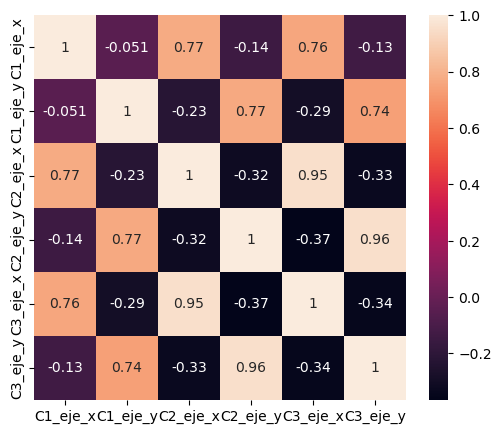

In [18]:
#Matriz de correlación
plt.figure(figsize = (6,5))
sns.heatmap(df_new.corr(), annot = True)
plt.show()

Text(0.5, 1.0, 'Distribución de las coordenada en X de la tercera zona')

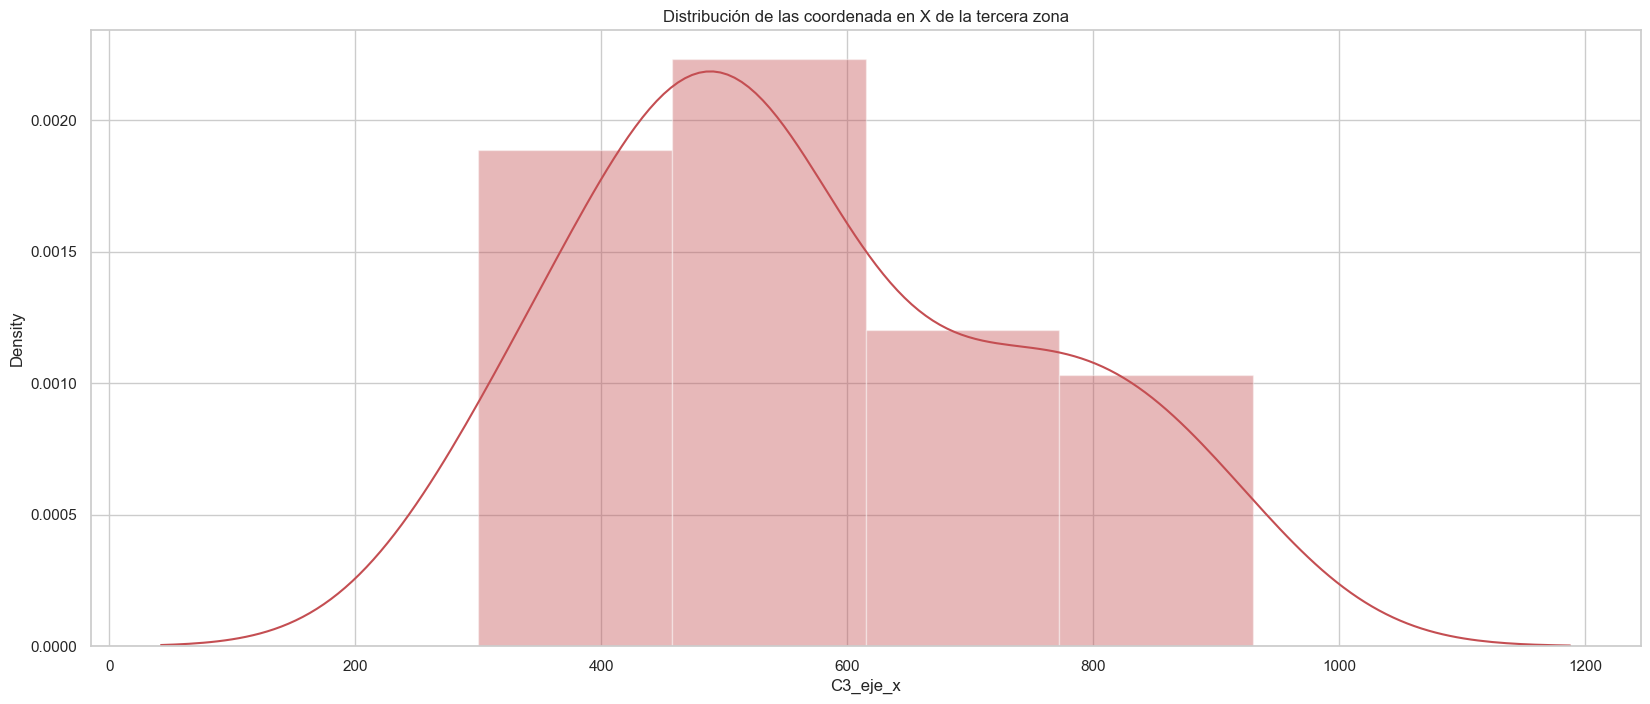

In [19]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.distplot(df_new["C3_eje_x"], kde = True, color = 'r')
plt.title("Distribución de las coordenada en X de la tercera zona")

Text(0.5, 1.0, 'Distribución de las coordenada en Y de la tercera zona')

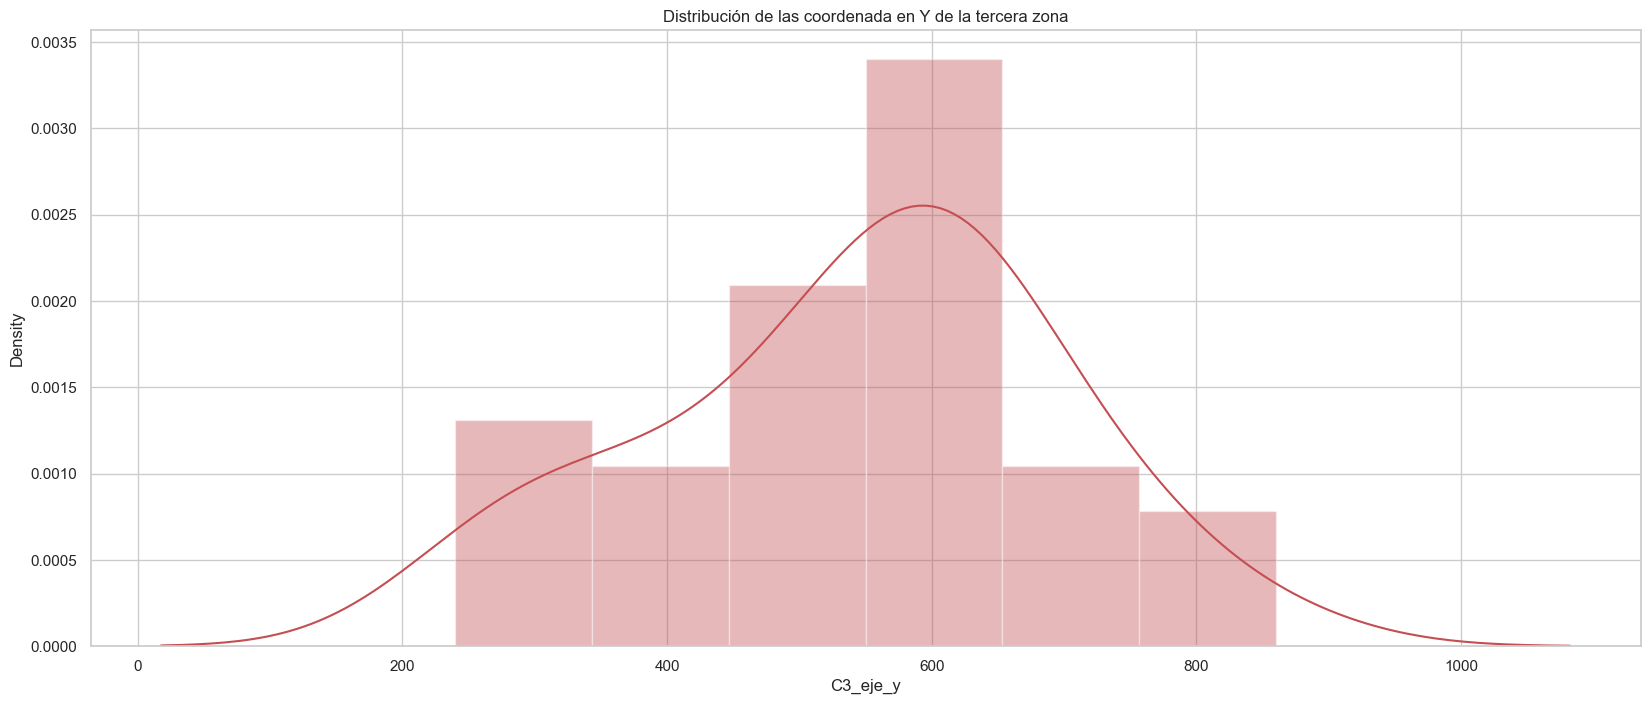

In [20]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.distplot(df_new["C3_eje_y"], kde = True, color = 'r')
plt.title("Distribución de las coordenada en Y de la tercera zona")

In [21]:
#Análisis bivariado
fig = px.bar(df_new, x = "C3_eje_x", y = "C3_eje_y", template = "plotly_dark", title = "Gráfico de barra C3_eje_x vs C3_eje_y")
fig.show()

In [22]:
fig = px.histogram(df_new, x = "C3_eje_x", facet_row = "C3_eje_y", template = "plotly_dark")
fig.show()

In [23]:
fig = px.scatter(df_new, x = "C3_eje_x", y = "C3_eje_y", template = "plotly_dark")
fig.show()

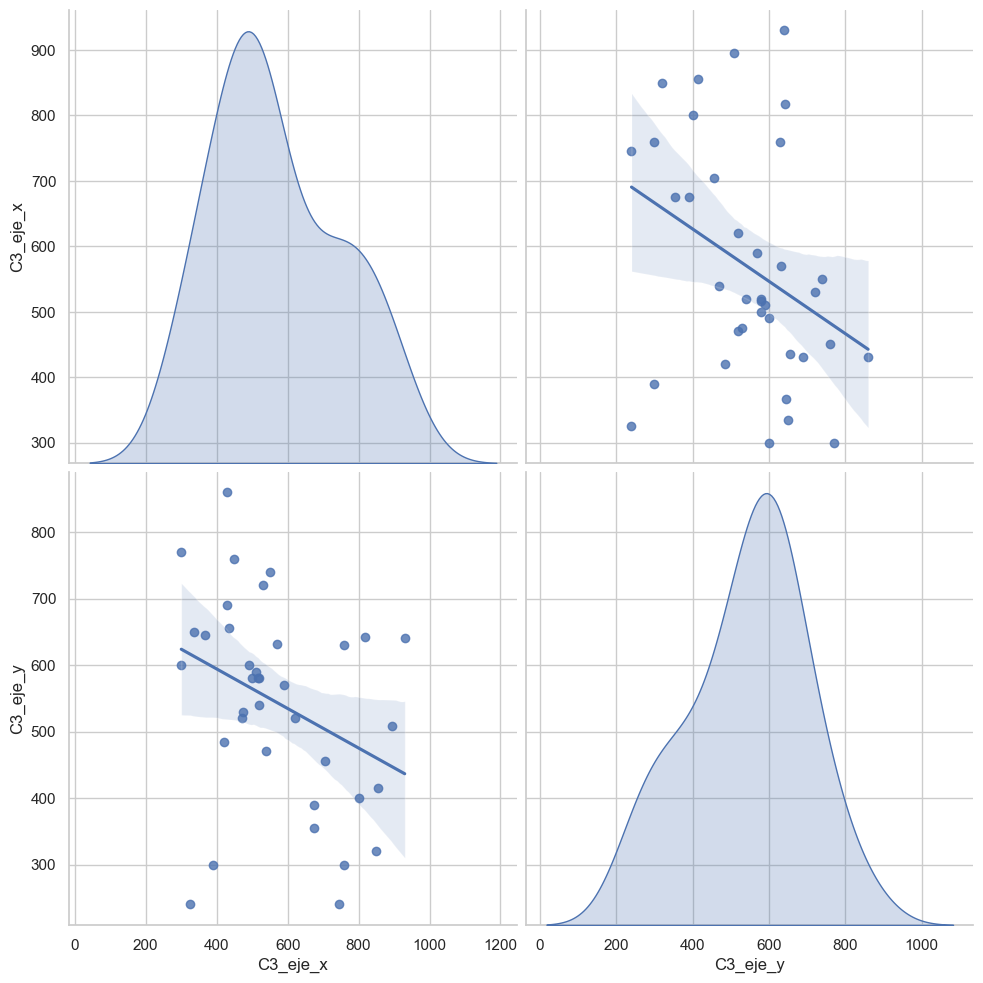

In [24]:
sns.pairplot(data = df_new, vars = ["C3_eje_x", "C3_eje_y"], kind = "reg", diag_kind = "kde", size = 5, palette = "husl")

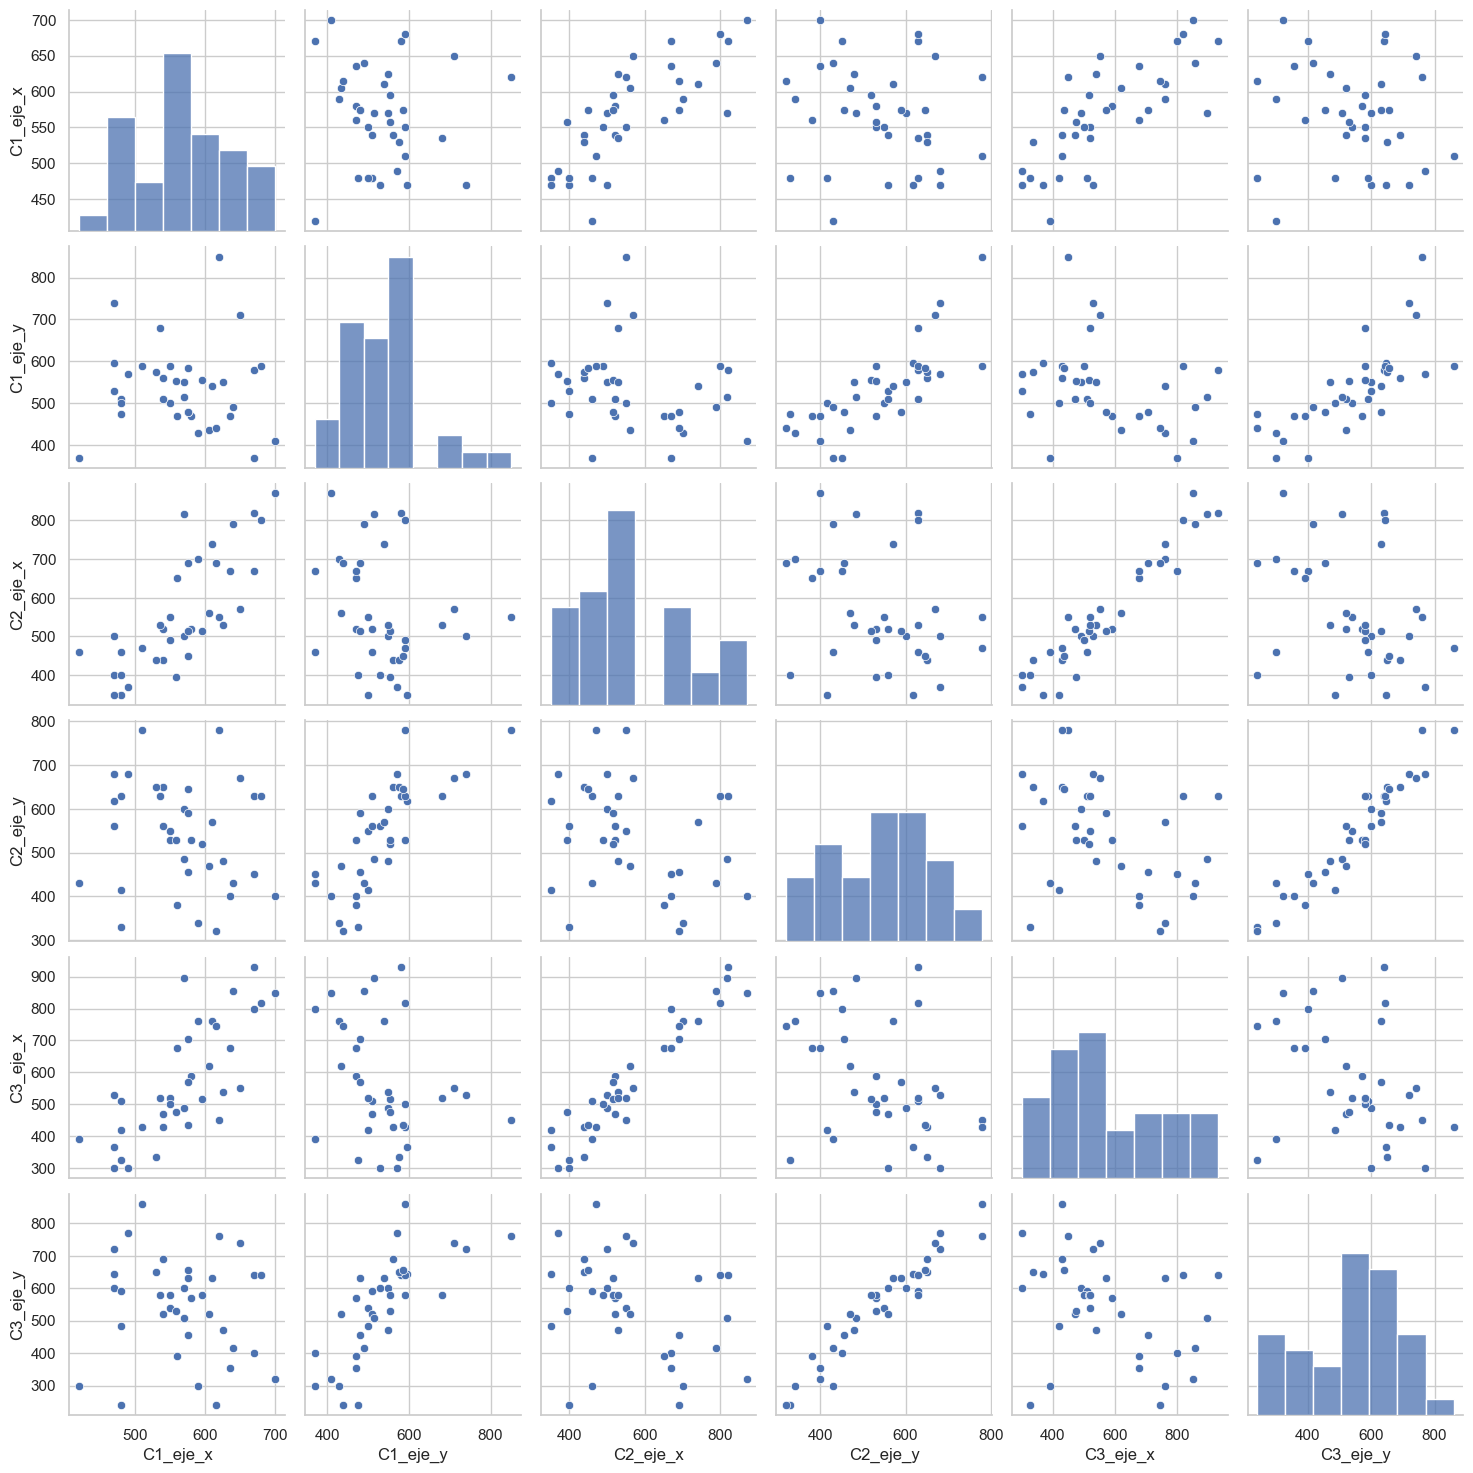

In [25]:
sns.pairplot(df_new)

### Modelo predictivo

In [26]:
X1 = df_new.drop(["C3_eje_x", "C3_eje_y"], axis = 1)
y1 = df_new["C3_eje_x"]
z1 = df_new["C3_eje_y"]

In [27]:
X1.shape, y1.shape, z1.shape

((37, 4), (37,), (37,))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

### Inserción de datos para la predicción

Aqui inserta los centros de las zonas del mapa en juego y ejecuta cada linea de codigo hasta el final

In [185]:
#Coordenada primera zona x
zona1_x = 670

#Coordenada primera zona y
zona1_y = 510

#Coordenada segunda zona x
zona2_x = 805

#Coordenada segunda zona y
zona2_y = 425

In [186]:
cord_zona = pd.DataFrame({"C1_eje_x":[zona1_x], "C1_eje_y":[zona1_y], 
                       "C2_eje_x":[zona2_x], "C2_eje_y":[zona2_y]})

cord_zona

C1_eje_x  C1_eje_y  C2_eje_x  C2_eje_y
0       670       510       805       425

### Librerías de los modelos a utilizar

#### Instalación de librerias

In [187]:
#!pip install xgboost

#### Importamos las librerias

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRFRegressor

### Método r2_score mayor

In [189]:
def mayorR2_score(r2):
    mayor = r2[0]
    
    for i in range(1, len(r2)):
        if r2[i] > mayor:
            mayor = r2[i]
            
    return mayor

### Hallando la Coordenada de X

In [190]:
#Entrenamos el modelo con un tamaño de prueba del 30% para el eje X
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)

#### Random Forest Regressor

In [191]:
#Inicializamos el modelo
model_rf = RandomForestRegressor()

#Entrenamos el modelo
model_rf.fit(X1_train, y1_train)

#Prediccion del modelo
pred_rf = model_rf.predict(X1_test)

In [192]:
print("Testing R2 Score: ", r2_score(y1_test, pred_rf))
print("Testing RMSE: ", np.sqrt(mean_squared_error(y1_test, pred_rf)))
print("Testing MAE: ", mean_absolute_error(y1_test, pred_rf))
print("Testing MSE: ", mean_squared_error(y1_test, pred_rf))

Testing R2 Score:  0.8184330309255223
Testing RMSE:  59.973884941697726
Testing MAE:  53.75416666666666
Testing MSE:  3596.8668749999974


In [193]:
print("Coordenada del eje X de la tercera zona: ", model_rf.predict(cord_zona))
cordX_rf = int(model_rf.predict(cord_zona)[0])
cordX_rf

Coordenada del eje X de la tercera zona:  [869.95]


869

#### Regresión Logística

In [194]:
#Inicializamos el modelo
model_lr = LogisticRegression()

#Entrenamos el modelo
model_lr.fit(X1_train, y1_train)

#Predicción del modelo
pred_lr = model_lr.predict(X1_test)

In [195]:
print("Testing R2 Score: ", r2_score(y1_test, pred_lr))
print("Testing RMSE: ", np.sqrt(mean_squared_error(y1_test, pred_lr)))
print("Testing MAE: ", mean_absolute_error(y1_test, pred_lr))
print("Testing MSE: ", mean_squared_error(y1_test, pred_lr))

Testing R2 Score:  0.6042977431590165
Testing RMSE:  88.5376567719446
Testing MAE:  71.41666666666667
Testing MSE:  7838.916666666667


In [196]:
print("Coordenada del eje X de la tercera zona: ", model_lr.predict(cord_zona))
cordX_lr = int(model_lr.predict(cord_zona)[0])
cordX_lr

Coordenada del eje X de la tercera zona:  [760]


760

#### Arbol de Decisión

In [197]:
#Inicializamos el modelo
model_dt = DecisionTreeClassifier()

#Entrenamos el modelo
model_dt.fit(X1_train, y1_train)

#Predicción del modelo
pred_dt = model_dt.predict(X1_test)

In [198]:
print("Testing R2 Score: ", r2_score(y1_test, pred_dt))
print("Testing RMSE: ", np.sqrt(mean_squared_error(y1_test, pred_dt)))
print("Testing MAE: ", mean_absolute_error(y1_test, pred_dt))
print("Testing MSE: ", mean_squared_error(y1_test, pred_dt))

Testing R2 Score:  0.08987261012528669
Testing RMSE:  134.27490458011877
Testing MAE:  118.08333333333333
Testing MSE:  18029.75


In [199]:
print("Coordenada del eje X de la tercera zona: ", model_dt.predict(cord_zona))
cordX_dt = int(model_dt.predict(cord_zona)[0])
cordX_dt

Coordenada del eje X de la tercera zona:  [855]


855

#### Red neuronal MLP

In [200]:
#Inicializamos el modelo
model_mlp = MLPClassifier()

#Entrenamos le modelo
model_mlp.fit(X1_train, y1_train)

#Prediccion del modelo
pred_mlp = model_mlp.predict(X1_test)

In [201]:
print("Testing R2 Score: ", r2_score(y1_test, pred_mlp))
print("Testing RMSE: ", np.sqrt(mean_squared_error(y1_test, pred_mlp)))
print("Testing MAE: ", mean_absolute_error(y1_test, pred_mlp))
print("Testing MSE: ", mean_squared_error(y1_test, pred_mlp))

Testing R2 Score:  0.37758302777057207
Testing RMSE:  111.04128361409853
Testing MAE:  91.5
Testing MSE:  12330.166666666666


In [202]:
print("Coordenada del eje X de la tercera zona: ", model_mlp.predict(cord_zona))
cordX_mlp = int(model_mlp.predict(cord_zona)[0])
cordX_mlp

Coordenada del eje X de la tercera zona:  [760]


760

#### XGBoost Regressor

In [203]:
#Inicializamos el modelo
model_xgb = XGBRFRegressor()

#Entrenamos el modelo
model_xgb.fit(X1_train, y1_train)

#Prediccion del modelo
pred_xgb = model_xgb.predict(X1_test)

In [204]:
print("Testing R2 Score: ", r2_score(y1_test, pred_xgb))
print("Testing RMSE: ", np.sqrt(mean_squared_error(y1_test, pred_xgb)))
print("Testing MAE: ", mean_absolute_error(y1_test, pred_xgb))
print("Testing MSE: ", mean_squared_error(y1_test, pred_xgb))

Testing R2 Score:  0.8758722239992702
Testing RMSE:  49.588188941958194
Testing MAE:  45.246289571126304
Testing MSE:  2458.988482543345


In [205]:
print("Coordenada del eje X de la tercera zona: ", model_xgb.predict(cord_zona))
cordX_xgb = int(model_xgb.predict(cord_zona)[0])
cordX_xgb

Coordenada del eje X de la tercera zona:  [888.5665]


888

### Representación del mejor modelo para el eje X

In [206]:
modelosX = pd.DataFrame({
    'Model' : ['Random Forest(RF)', 'Regresión Logistica(LR)', 'Arbol de Decisión(DT)', 'Red Neuronal MLP(MLP)', 'XGBoost Regressor(XGB)'],
    'R2-Test': [r2_score(y1_test, pred_rf), r2_score(y1_test, pred_lr), r2_score(y1_test, pred_dt), r2_score(y1_test, pred_mlp), r2_score(y1_test, pred_xgb)],
    'RMSE-Test': [np.sqrt(mean_squared_error(y1_test, pred_rf)), np.sqrt(mean_squared_error(y1_test, pred_lr)), np.sqrt(mean_squared_error(y1_test, pred_dt)), np.sqrt(mean_squared_error(y1_test, pred_mlp)), np.sqrt(mean_squared_error(y1_test, pred_xgb))]
})

modelosX

Model   R2-Test   RMSE-Test
0        Random Forest(RF)  0.818433   59.973885
1  Regresión Logistica(LR)  0.604298   88.537657
2    Arbol de Decisión(DT)  0.089873  134.274905
3    Red Neuronal MLP(MLP)  0.377583  111.041284
4   XGBoost Regressor(XGB)  0.875872   49.588189

In [207]:
#Creamos la lista r2_scores con todos los r2_scores de los modelos para la coordenada Y
r2_scores = [r2_score(y1_test, pred_rf), r2_score(y1_test, pred_lr), r2_score(y1_test, pred_dt), r2_score(y1_test, pred_mlp), r2_score(y1_test, pred_xgb)]

r2_scores

[0.8184330309255223,
 0.6042977431590165,
 0.08987261012528669,
 0.37758302777057207,
 0.8758722239992702]

In [208]:
#Obtenemos el mayor de ellos con la función mayorR2_score establecida
mayor_score = mayorR2_score(r2_scores)
mayor_score

0.8758722239992702

In [209]:
#Método para escoger la coordenada X del mejor modelo
def ejeX(num):
    selection = {
        r2_score(y1_test, pred_rf): cordX_rf,
        r2_score(y1_test, pred_lr): cordX_lr,
        r2_score(y1_test, pred_dt): cordX_dt,
        r2_score(y1_test, pred_mlp): cordX_mlp, 
        r2_score(y1_test, pred_xgb): cordX_xgb
    }
    
    return selection.get(num)

mejor_cordX = int(ejeX(mayor_score))

mejor_cordX

888

### Hallando la coordenada del eje Y

In [210]:
#Entrenamos el modelo con un tamaño de prueba del 30% para el eje Y
X1_train, X1_test, z1_train, z1_test = train_test_split(X1, z1, test_size = 0.3, random_state = 1)

#### Random Forest Regressor

In [211]:
#Entrenamos el modelo
model_rf.fit(X1_train, z1_train)

#Prediccion del modelo
pred_rf = model_rf.predict(X1_test)

print("Testing R2 Score: ", r2_score(z1_test, pred_rf))
print("Testing RMSE: ", np.sqrt(mean_squared_error(z1_test, pred_rf)))
print("Testing MAE: ", mean_absolute_error(z1_test, pred_rf))
print("Testing MSE: ", mean_squared_error(z1_test, pred_rf))

Testing R2 Score:  0.7411156773047091
Testing RMSE:  59.94642010440101
Testing MAE:  49.44666666666668
Testing MSE:  3593.5732833333336


In [212]:
print("Coordenada del eje Y de la tercera zona: ", model_rf.predict(cord_zona))
cordY_rf = int(model_rf.predict(cord_zona)[0])
cordY_rf

Coordenada del eje Y de la tercera zona:  [433.19]


433

#### Regresión Logística

In [213]:
#Entrenamos el modelo
model_lr.fit(X1_train, z1_train)

#Prediccion del modelo
pred_lr = model_lr.predict(X1_test)

print("Testing R2 Score: ", r2_score(z1_test, pred_lr))
print("Testing RMSE: ", np.sqrt(mean_squared_error(z1_test, pred_lr)))
print("Testing MAE: ", mean_absolute_error(z1_test, pred_lr))
print("Testing MSE: ", mean_squared_error(z1_test, pred_lr))

Testing R2 Score:  -1.6336299017842135
Testing RMSE:  191.19993898185916
Testing MAE:  158.91666666666666
Testing MSE:  36557.416666666664


In [214]:
print("Coordenada del eje Y de la tercera zona: ", model_lr.predict(cord_zona))
cordY_lr = int(model_lr.predict(cord_zona)[0])
cordY_lr

Coordenada del eje Y de la tercera zona:  [300]


300

#### Arbol de decisión

In [215]:
#Entrenamos el modelo
model_dt.fit(X1_train, z1_train)

#Prediccion del modelo
pred_dt = model_dt.predict(X1_test)

print("Testing R2 Score: ", r2_score(z1_test, pred_dt))
print("Testing RMSE: ", np.sqrt(mean_squared_error(z1_test, pred_dt)))
print("Testing MAE: ", mean_absolute_error(z1_test, pred_dt))
print("Testing MSE: ", mean_squared_error(z1_test, pred_dt))

Testing R2 Score:  -1.0695194870686549
Testing RMSE:  169.49041270821192
Testing MAE:  141.0
Testing MSE:  28727.0


In [216]:
print("Coordenada del eje Y de la tercera zona: ", model_dt.predict(cord_zona))
cordY_dt = int(model_dt.predict(cord_zona)[0])
cordY_dt

Coordenada del eje Y de la tercera zona:  [520]


520

#### Red neuronal MLP

In [217]:
#Entrenamos el modelo
model_mlp.fit(X1_train, z1_train)

#Prediccion del modelo
pred_mlp = model_mlp.predict(X1_test)

print("Testing R2 Score: ", r2_score(z1_test, pred_mlp))
print("Testing RMSE: ", np.sqrt(mean_squared_error(z1_test, pred_mlp)))
print("Testing MAE: ", mean_absolute_error(z1_test, pred_mlp))
print("Testing MSE: ", mean_squared_error(z1_test, pred_mlp))

Testing R2 Score:  -0.24071872823763907
Testing RMSE:  131.23420539884663
Testing MAE:  111.41666666666667
Testing MSE:  17222.416666666668


In [218]:
print("Coordenada del eje Y de la tercera zona: ", model_mlp.predict(cord_zona))
cordY_mlp = int(model_mlp.predict(cord_zona)[0])
cordY_mlp

Coordenada del eje Y de la tercera zona:  [415]


415

#### XGBoost Regressor

In [219]:
#Entrenamos el modelo
model_xgb.fit(X1_train, z1_train)

#Prediccion del modelo
pred_xgb = model_xgb.predict(X1_test)

print("Testing R2 Score: ", r2_score(z1_test, pred_xgb))
print("Testing RMSE: ", np.sqrt(mean_squared_error(z1_test, pred_xgb)))
print("Testing MAE: ", mean_absolute_error(z1_test, pred_xgb))
print("Testing MSE: ", mean_squared_error(z1_test, pred_xgb))

Testing R2 Score:  0.6863637492889376
Testing RMSE:  65.98170046399423
Testing MAE:  52.59864807128906
Testing MSE:  4353.584796120257


In [220]:
print("Coordenada del eje Y de la tercera zona: ", model_xgb.predict(cord_zona))
cordY_xgb = int(model_xgb.predict(cord_zona)[0])
cordY_xgb

Coordenada del eje Y de la tercera zona:  [460.36563]


460

### Representación del mejor modelo para el eje Y

In [221]:
modelosY = pd.DataFrame({
    'Model' : ['Random Forest(RF)', 'Regresión Logistica(LR)', 'Arbol de Decisión(DT)', 'Red Neuronal MLP(MLP)', 'XGBoost Regressor(XGB)'],
    'R2-Test': [r2_score(z1_test, pred_rf), r2_score(z1_test, pred_lr), r2_score(z1_test, pred_dt), r2_score(z1_test, pred_mlp), r2_score(z1_test, pred_xgb)],
    'RMSE-Test': [np.sqrt(mean_squared_error(z1_test, pred_rf)), np.sqrt(mean_squared_error(z1_test, pred_lr)), np.sqrt(mean_squared_error(z1_test, pred_dt)), np.sqrt(mean_squared_error(z1_test, pred_mlp)), np.sqrt(mean_squared_error(z1_test, pred_xgb))]
})

modelosY

Model   R2-Test   RMSE-Test
0        Random Forest(RF)  0.741116   59.946420
1  Regresión Logistica(LR) -1.633630  191.199939
2    Arbol de Decisión(DT) -1.069519  169.490413
3    Red Neuronal MLP(MLP) -0.240719  131.234205
4   XGBoost Regressor(XGB)  0.686364   65.981700

In [222]:
#Creamos la lista r2_scores con todos los r2_scores de los modelos para la coordenada Y
r2_scores = [r2_score(z1_test, pred_rf), r2_score(z1_test, pred_lr), r2_score(z1_test, pred_dt), r2_score(z1_test, pred_mlp), r2_score(z1_test, pred_xgb)]

r2_scores

[0.7411156773047091,
 -1.6336299017842135,
 -1.0695194870686549,
 -0.24071872823763907,
 0.6863637492889376]

In [223]:
#Obtenemos el mayor de ellos con la función mayorR2_score establecida
mayor_score = mayorR2_score(r2_scores)
mayor_score

0.7411156773047091

In [224]:
#Método para escoger la coordenada Y del mejor modelo
def ejeY(num):
    selection = {
        r2_score(z1_test, pred_rf): cordY_rf,
        r2_score(z1_test, pred_lr): cordY_lr,
        r2_score(z1_test, pred_dt): cordY_dt,
        r2_score(z1_test, pred_mlp): cordY_mlp, 
        r2_score(z1_test, pred_xgb): cordY_xgb
    }
    
    return selection.get(num)

mejor_cordY = int(ejeY(mayor_score))

mejor_cordY

433

### Dibujando la predicción de las coordenadas

#### Métodos para mostrar imagen

In [225]:
def mostrar_imagen(title, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [226]:
args = {
    "bermuda" :"bermuda.jpg"
}

#### Color de las zonas

In [227]:
#Circulo zona 1
colorZona1 = (0, 0, 0) #Negro

#Circulo zona 2
colorZona2 = (255, 0, 0) #Azul

#Circulo zona 3
colorZona3 = (0, 0, 255) #Roja

#Circulo zona 4
colorZona4 = (0, 255, 0) #Verde

#### Radios de las zonas

In [228]:
#Radio zona 1
radioZona1 = 350

#Radio zona 2
radioZona2 = 180

#Radio zona 3
radioZona3 = 80

#Radio zona 4
radioZona4 = 45

#### Mapa Bermuda

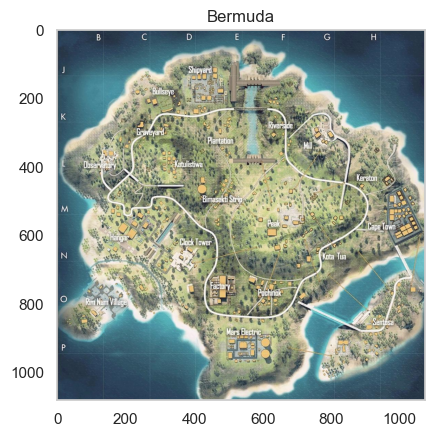

In [229]:
imagen = cv2.imread(args["bermuda"])
mostrar_imagen("Bermuda", imagen)

#### Probar mapa

In [230]:
#imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
#predic_circ_zona1 = cv2.circle(imagen, (590,430), radioZona1, colorZona1, 5)
#predic_circ_zona2 = cv2.circle(imagen, (700,340), radioZona2, colorZona2, 5)
#predic_circ_zona3 = cv2.circle(imagen, (760,300), radioZona3, colorZona3, 5)
#mostrar_imagen("Predicción zona RF", imagen)

#### Predicción zonas Bermuda RandomForest

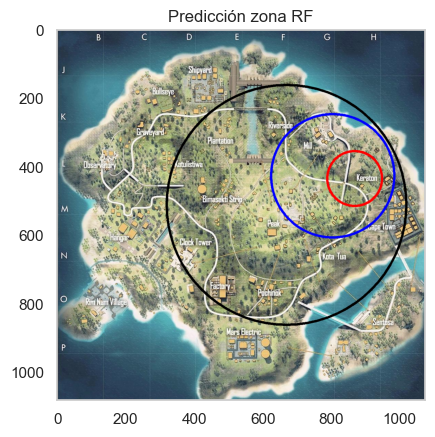

In [231]:
imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
predic_circ_zona1 = cv2.circle(imagen, (zona1_x,zona1_y), radioZona1, colorZona1, 5)
predic_circ_zona2 = cv2.circle(imagen, (zona2_x,zona2_y), radioZona2, colorZona2, 5)
predic_circ_zona3 = cv2.circle(imagen, (cordX_rf,cordY_rf), radioZona3, colorZona3, 5)
mostrar_imagen("Predicción zona RF", imagen)

#### Predicción de zonas Regresión Logistica

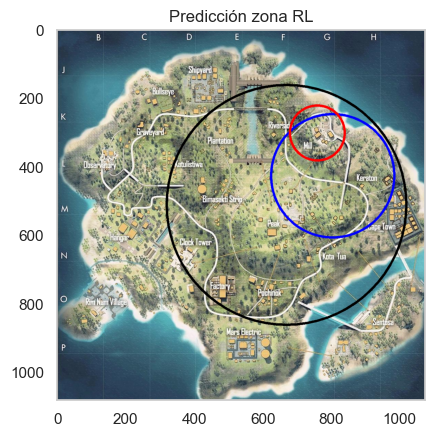

In [232]:
imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
predic_circ_zona1 = cv2.circle(imagen, (zona1_x,zona1_y), radioZona1, colorZona1, 5)
predic_circ_zona2 = cv2.circle(imagen, (zona2_x,zona2_y), radioZona2, colorZona2, 5)
predic_circ_zona3 = cv2.circle(imagen, (cordX_lr,cordY_lr), radioZona3, colorZona3, 5)
mostrar_imagen("Predicción zona RL", imagen)

#### Predicción de zonas Arbol de Decisión

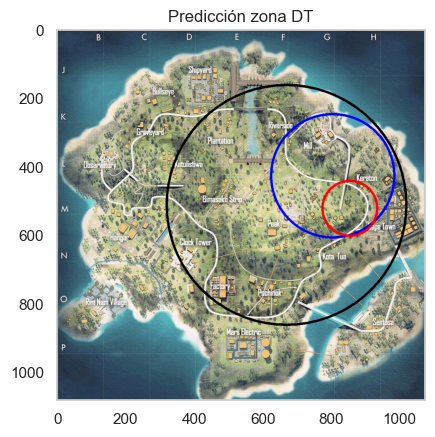

In [233]:
imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
predic_circ_zona1 = cv2.circle(imagen, (zona1_x,zona1_y), radioZona1, colorZona1, 5)
predic_circ_zona2 = cv2.circle(imagen, (zona2_x,zona2_y), radioZona2, colorZona2, 5)
predic_circ_zona3 = cv2.circle(imagen, (cordX_dt,cordY_dt), radioZona3, colorZona3, 5)
mostrar_imagen("Predicción zona DT", imagen)

#### Predicción de zonas Red Neuronal MLP

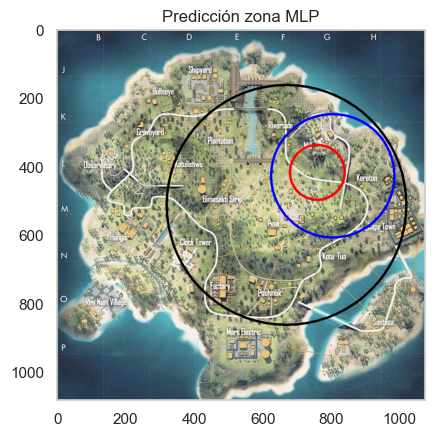

In [234]:
imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
predic_circ_zona1 = cv2.circle(imagen, (zona1_x,zona1_y), radioZona1, colorZona1, 5)
predic_circ_zona2 = cv2.circle(imagen, (zona2_x,zona2_y), radioZona2, colorZona2, 5)
predic_circ_zona3 = cv2.circle(imagen, (cordX_mlp,cordY_mlp), radioZona3, colorZona3, 5)
mostrar_imagen("Predicción zona MLP", imagen)

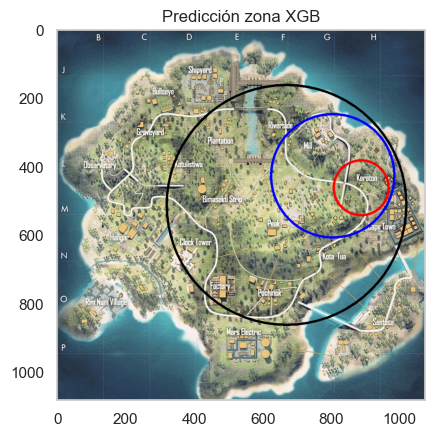

In [235]:
imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
predic_circ_zona1 = cv2.circle(imagen, (zona1_x,zona1_y), radioZona1, colorZona1, 5)
predic_circ_zona2 = cv2.circle(imagen, (zona2_x,zona2_y), radioZona2, colorZona2, 5)
predic_circ_zona3 = cv2.circle(imagen, (cordX_xgb,cordY_xgb), radioZona3, colorZona3, 5)
mostrar_imagen("Predicción zona XGB", imagen)

### MEJOR RESULTADO DE LOS MODELOS DE PREDICCIÓN

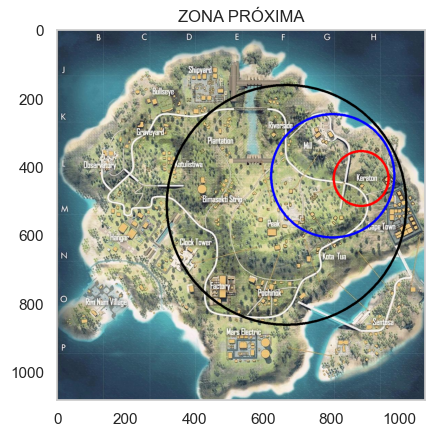

In [236]:
imagen = cv2.imread(args["bermuda"])

#(x,y), radio, color, ancho
predic_circ_zona1 = cv2.circle(imagen, (zona1_x,zona1_y), radioZona1, colorZona1, 5)
predic_circ_zona2 = cv2.circle(imagen, (zona2_x,zona2_y), radioZona2, colorZona2, 5)
predic_circ_zona3 = cv2.circle(imagen, (mejor_cordX,mejor_cordY), radioZona3, colorZona3, 5)
mostrar_imagen("ZONA PRÓXIMA", imagen)